In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit import execute, Aer

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, AncillaRegister, ClassicalRegister
from qiskit.circuit.library import DraperQFTAdder, CDKMRippleCarryAdder,VBERippleCarryAdder


In [3]:
# To Compute a-b, using Two's Complement Subtractor

In [4]:
def OnesComplement(qc,b_qr,n):
    
    #001 -> 110 : 1's complement
    for j in range(n):
        qc.x(b_qr[j])
    qc.barrier()

In [5]:
def TwosComplement(qc,b_qr,n):
    
    #001 -> 110 : 1's complement
    OnesComplement(qc,b_qr,n+1)
    #adding one to make twos complement
    adder=DraperQFTAdder(n+1,kind='fixed')
    qc.compose(adder,qubits=list(range(2*n+1,3*n+2))+list(range(n,2*n+1)),inplace=True)
    qc.x(b_qr[-1])
    qc.barrier()
    
    qc.draw('mpl')
      

In [6]:
def TwosComplementSubtractor(qc, qr_a, qr_b, n):
    
    # taking 2's complement of b
    # let b = 100
    # twosc_b = (-b) = 011 + 001 = 100
    
    TwosComplement(qc,qr_b, n)
    adder=DraperQFTAdder(n,kind='half')
    qc.compose(adder,range(0,2*n+1),inplace=True)
    
    qc.barrier()
    #add(qc,qr_a,qr_b,n)
    qc.measure(b,cb)
    qc.barrier()
    # Simulate the circuit.
    backend_sim = Aer.get_backend('qasm_simulator')
    job_sim = execute(qc, backend_sim)
    result_sim = job_sim.result()
    state_b = list(result_sim.get_counts(qc).keys())[0]
    # if carry =0
    if (state_b[0] == '0'):
        print("**Inside if***")
        TwosComplement(qc,qr_b, n)
        qc.measure(b, cb)
        # Simulate the circuit.
        backend_sim = Aer.get_backend('qasm_simulator')
        job_sim = execute(qc, backend_sim)
        result_sim = job_sim.result()

        state_b = list(result_sim.get_counts(qc).keys())[0]
        return ['-ve',state_b]        
    else:
        print("**Inside else***")
        
        qc.measure(b, cb)
        # Simulate the circuit.
        backend_sim = Aer.get_backend('qasm_simulator')
        job_sim = execute(qc, backend_sim)
        result_sim = job_sim.result()

        state_b = list(result_sim.get_counts(qc).keys())[0]
        return ['+ve',state_b[1:]]

In [7]:
n = int(input())
#n =3


3


In [8]:
### Registers and circuit.
a=QuantumRegister(n,'a')
b=QuantumRegister(n+1,'b')
one=QuantumRegister(n+1,'one')

cb=ClassicalRegister(n+1,'c_b')


qc=QuantumCircuit(a,b,one,cb)

qc.x(one[0])

# Numbers to Add.



In [9]:
in_a = input() 
in_b = input()

#To find a-b

2
1


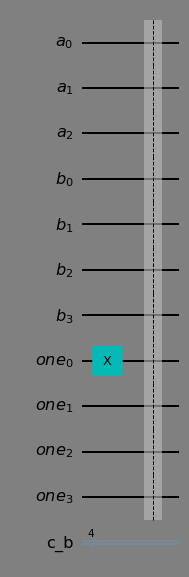

In [10]:

if len(in_a)==n and len(in_b)==n:
    #for a
    for i in range(len(in_a)):
        if(in_a[::-1][i] == '1'):
            qc.x(a[i])
    #for b
    for i in range(len(in_b)):
        if(in_b[::-1][i] == '1'):
            qc.x(b[i])
qc.barrier()

qc.draw(output = "mpl" ,style = {'backgroundcolor':'gray'})

In [11]:
result = TwosComplementSubtractor(qc, a, b, n)

**Inside else***


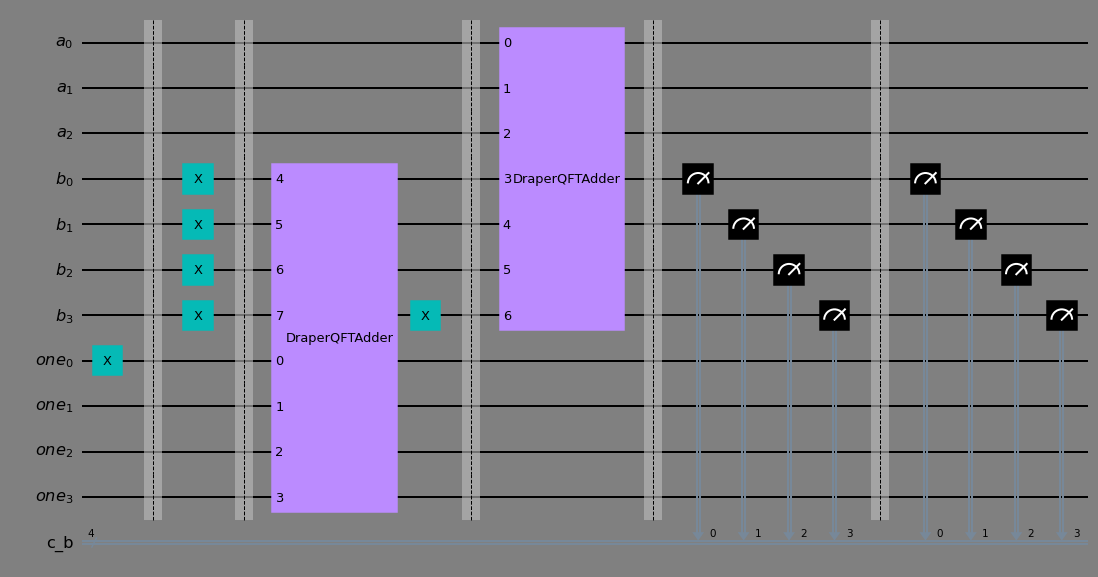

In [12]:
qc.draw(output = "mpl" ,style = {'backgroundcolor':'gray'})

In [13]:
result

['+ve', '000']

In [14]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.21.0', 'qiskit-aer': '0.10.4', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.19.2', 'qiskit': '0.37.0', 'qiskit-nature': '0.4.2', 'qiskit-finance': '0.3.3', 'qiskit-optimization': '0.4.0', 'qiskit-machine-learning': '0.4.0'}